raw data + manually pick spike time -- filter -- threshold crossing -- pca

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/Users/xiao-zy19/Desktop/good_cs')
data = np.fromfile('Good_cplx_spikes.bin', dtype=np.int16).reshape(-1, 128) #reshape((-1, 128))
print(data.shape)

(6122790, 128)


In [22]:
# design filters
from scipy.signal import butter, sosfilt, sosfreqz, filtfilt

# Sample rate and desired cutoff frequencies
fs = 30000  # Sample rate
lowcut = 300  # High-pass filter cutoff frequency
highcut = 1000  # High corner frequency for the band-pass filter
lowcut_bp = 100  # Low corner frequency for the band-pass filter

# Butterworth High-Pass Filter
def butter_highpass(cutoff, fs, order=10):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='high', analog=False, output='sos')
    return sos

# Band-Pass Filter
def butter_bandpass(lowcut_bp, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut_bp / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', analog=False, output='sos')
    return sos

def apply_filter(data, sos):
    y = sosfilt(sos, data)
    return y

# initialize the filters
sos_highpass = butter_highpass(lowcut, fs, order=10)
sos_bandpass = butter_bandpass(lowcut_bp, highcut, fs, order=2)
sos_preprocess = butter_highpass(2, fs, order=10)

# Frequency response for the filters
f_hp, h_hp = sosfreqz(sos_highpass, worN=2000, fs=fs)
f_bp, h_bp = sosfreqz(sos_bandpass, worN=2000, fs=fs)

In [23]:
# plt.figure(figsize=(10, 6))

# sum_channels = np.zeros(data.shape[0])

# for channel in range(21, 26, 1): 
#     sum_channels += data[:, channel]
# mean_channels = sum_channels / 4
# data[:, 23] = data[:, 23] - mean_channels
# for channel in range(21, 26, 1):
#     # apply filter
#     b, a = butter(3, 300, fs=fs, btype='high')
#     data_filtered = filtfilt(b, a, data[:, channel])
#     time = int(72.5615 * 30000)
    
#     plt.plot(200*(channel-23)+data_filtered[time-100:time+100], label='channel {}'.format(channel), alpha=0.7)
# # plt.legend()
# plt.grid(linestyle='--', alpha=0.3)
# plt.show()

[2176845, 2792250, 3407550, 4024905, 4025010, 4025310, 4026120, 4027341, 4040690, 4042667, 4043586]


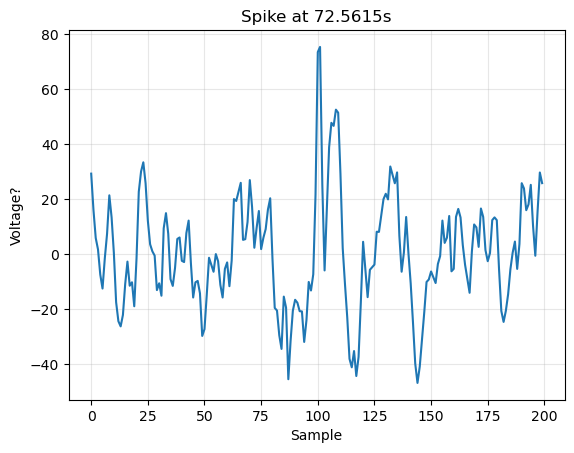

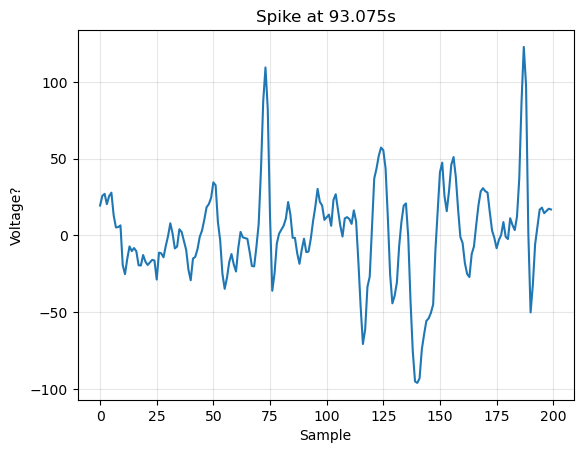

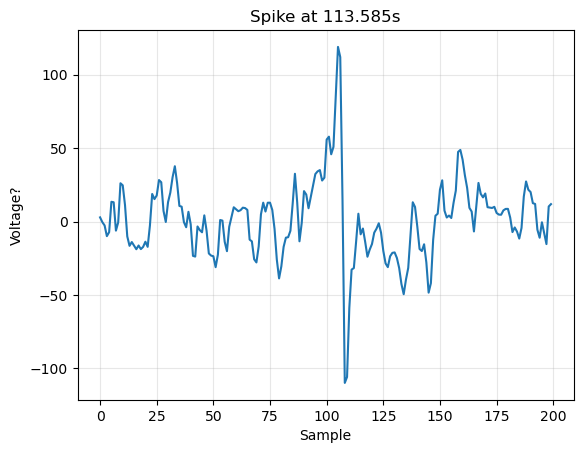

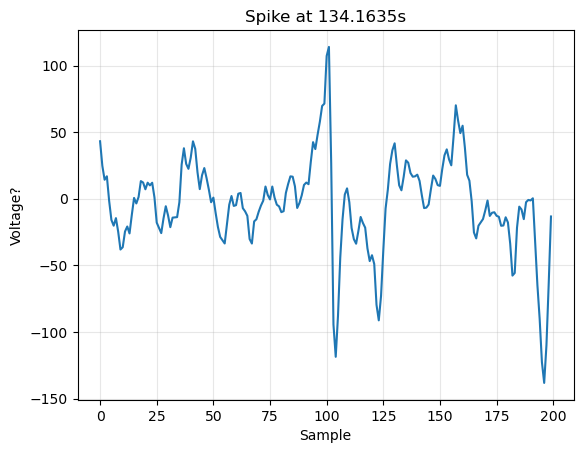

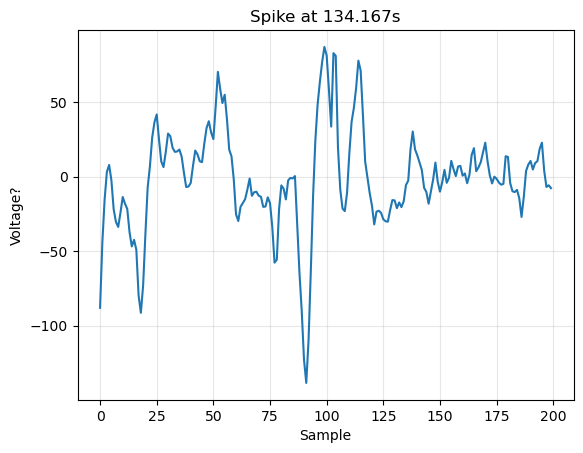

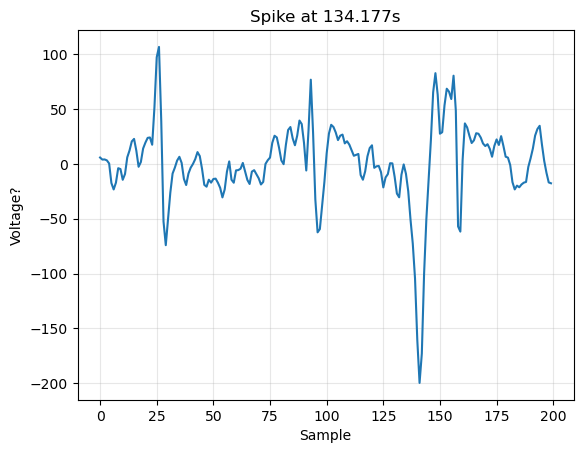

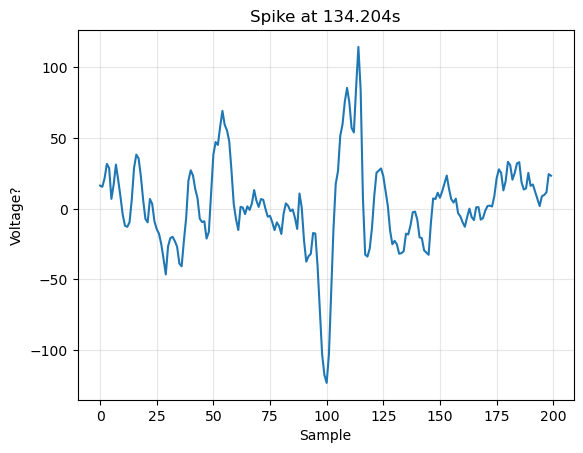

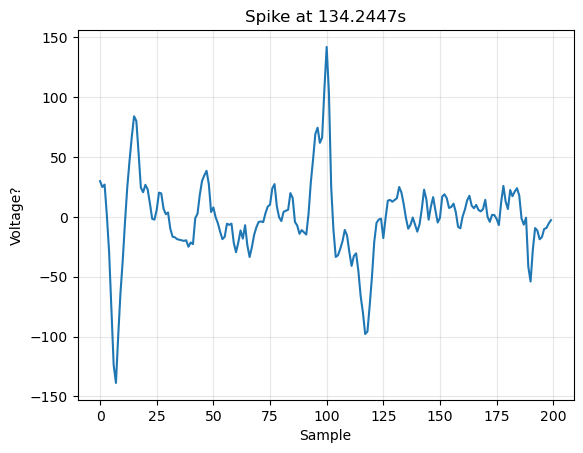

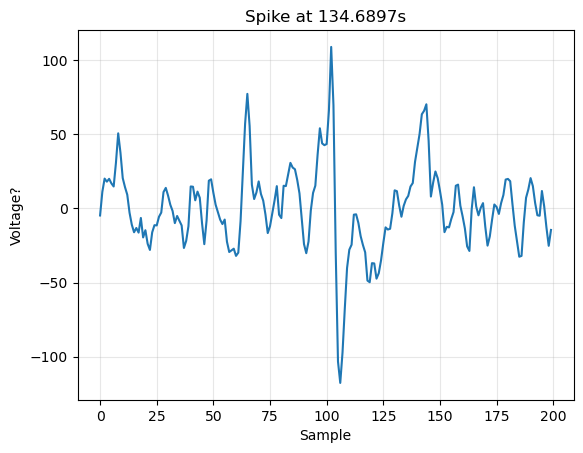

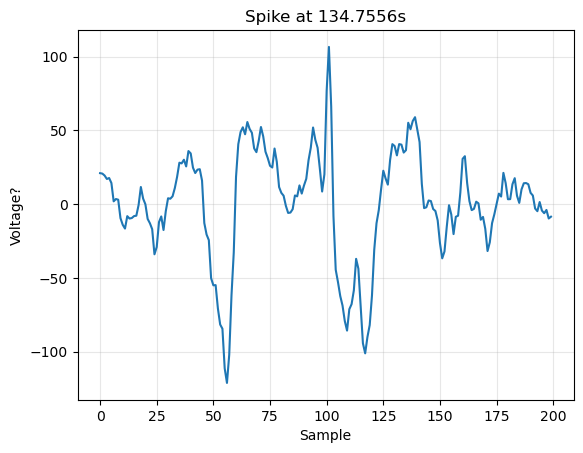

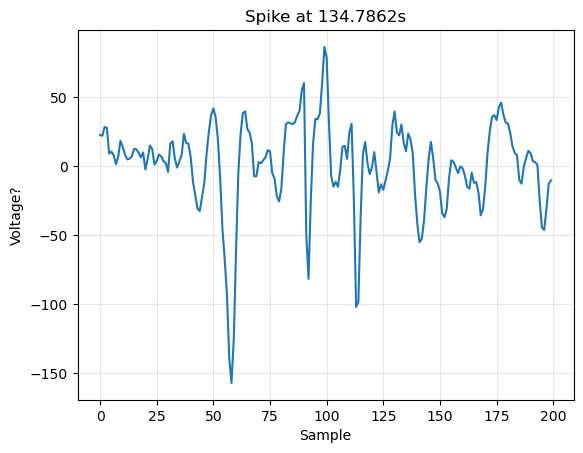

In [31]:
# channel23 = data[:, 23]
channel23 = apply_filter(data[:, 23], sos_preprocess)
b, a = butter(3, 300, fs=fs, btype='high')
channel23 = filtfilt(b, a, data[:, 23])

complex_spike_time = [72.5615, 93.075, 113.585, 134.1635, 134.167, 134.177, 134.204, 134.2447, 134.6897, 134.7556, 134.7862]
# record_spike_time = [134.1635] 134.102, 113.541 72.4835, 
complex_spike_index = [int(x*30000) for x in complex_spike_time]
print(complex_spike_index)

for i in range(len(complex_spike_index)):
    plt.figure()
    plt.plot(channel23[complex_spike_index[i]-100:complex_spike_index[i]+100])
    plt.title(f'Spike at {complex_spike_time[i]}s')
    plt.xlabel('Sample')
    plt.ylabel('Voltage?')
    plt.grid(alpha=0.3)
    plt.show()

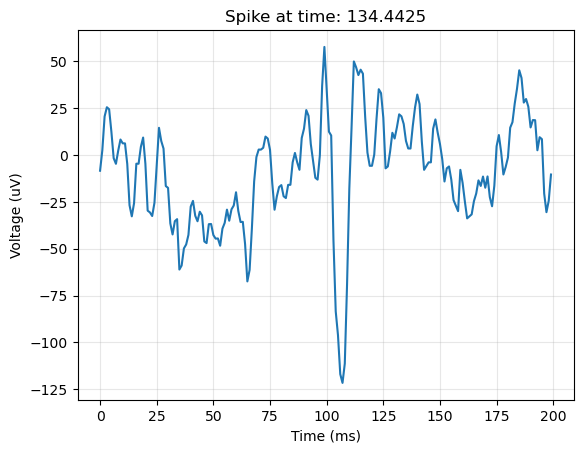

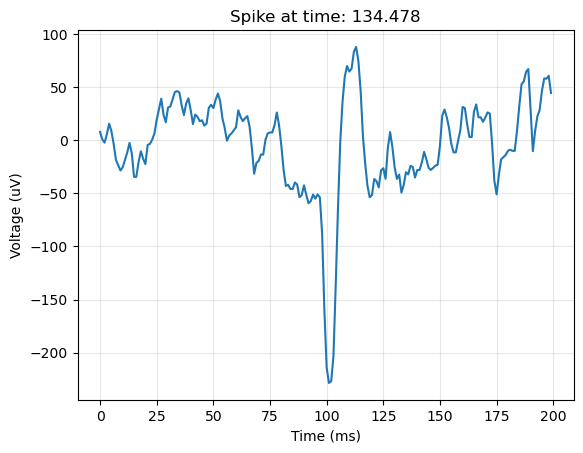

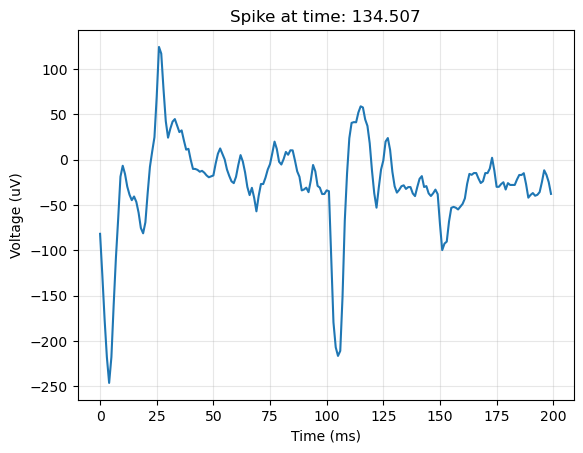

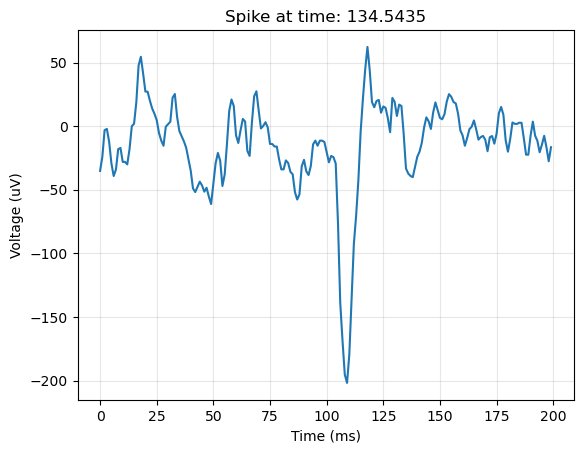

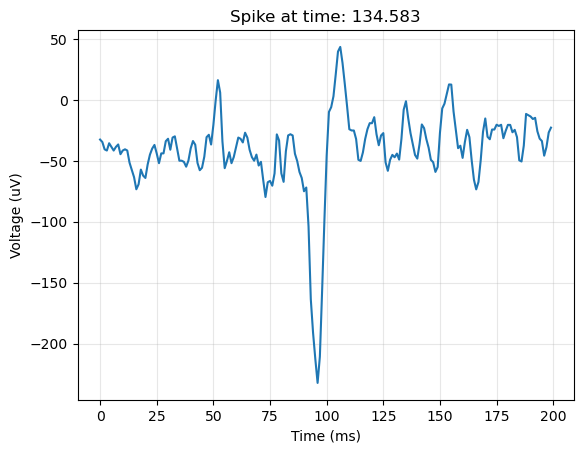

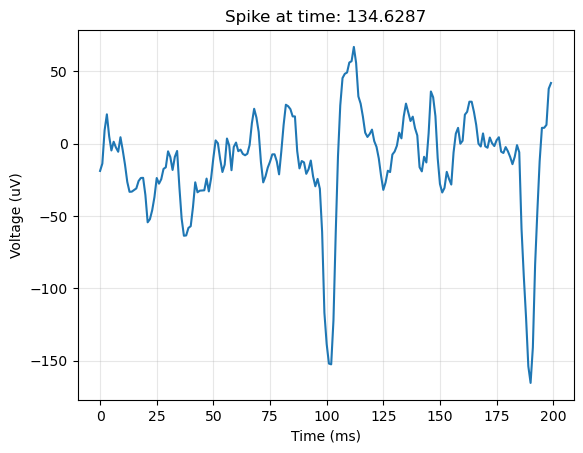

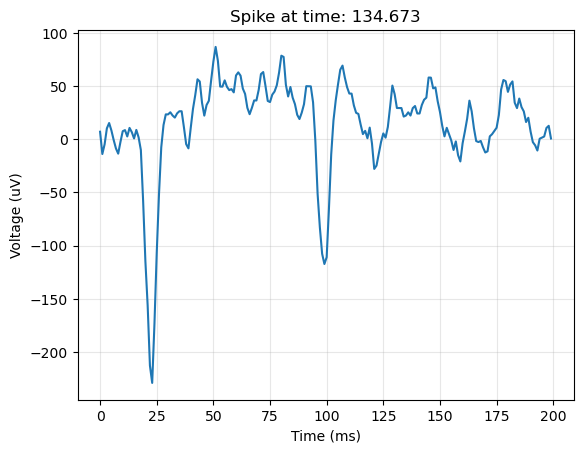

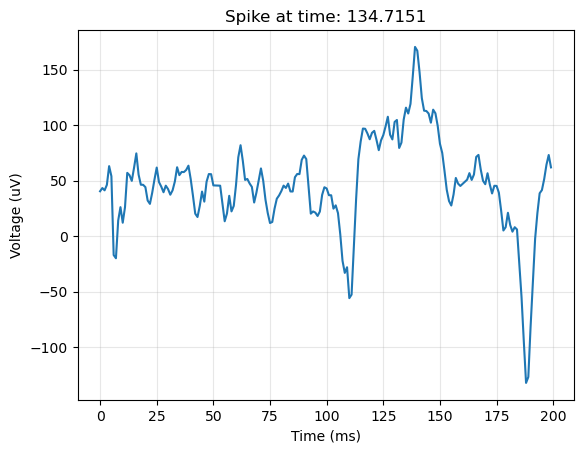

In [25]:
# channel22 = data[:, 22]
channel22 = apply_filter(data[:, 22], sos_preprocess)

simple_spike_time = [134.4425, 134.478, 134.507, 134.5435, 134.583, 134.6287, 134.673, 134.7151]
simple_spike_index = [int(x*30000) for x in simple_spike_time]

for i in range(len(simple_spike_index)):
    plt.figure()
    plt.plot(channel22[simple_spike_index[i]-100:simple_spike_index[i]+100])
    plt.title('Spike at time: ' + str(simple_spike_time[i]))
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (uV)')
    plt.grid(alpha=0.3)
    plt.show()

(400000,)
(320000,)
(720000,)


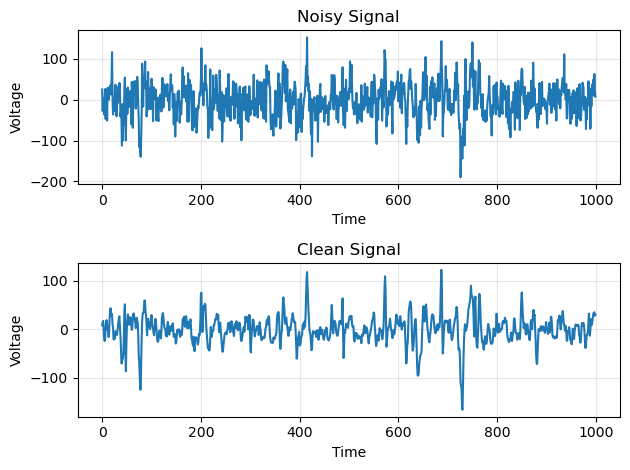

In [26]:
# randomly repeat complex spike index
complex_spike_index = complex_spike_index * 100
new_signal1 = np.zeros(200)
for i in range(len(complex_spike_index)):
    new_signal1 = np.concatenate((new_signal1, channel23[complex_spike_index[i]-200:complex_spike_index[i]+200]), axis=0)
new_signal1 = new_signal1[200:]
print(new_signal1.shape)

# repeat simple spike index 100 times
simple_spike_index = simple_spike_index * 100
new_signal2 = np.zeros(200)
for i in range(len(simple_spike_index)):
    new_signal2 = np.concatenate((new_signal2, channel22[simple_spike_index[i]-200:simple_spike_index[i]+200]), axis=0)
new_signal2 = new_signal2[200:]
print(new_signal2.shape)

# concatenate the two signals
new_signal = np.concatenate((new_signal1, new_signal2), axis=0)
print(new_signal.shape)

# add random noise to the signal
noise = np.random.normal(0, 30, len(new_signal))
# noise = np.zeros(len(new_signal))
noisy_signal = new_signal + noise

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(noisy_signal[:1000])
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(new_signal[:1000])
plt.title('Clean Signal')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

threshold: -40, crossing points: [200, 600, 1000, 1400, 1800, 2200, 2600, 3000, 3400, 3800, 4200, 4600, 5000, 5400, 5800, 6200, 6600, 7000, 7400, 7800, 8200, 8600, 9000, 9400, 9800, 10200, 10600, 11000, 11400, 11800, 12200, 12600, 13000, 13400, 13800, 14200, 14600, 15000, 15400, 15800, 16200, 16600, 17000, 17400, 17800, 18200, 18600, 19000, 19400, 19800, 20200, 20600, 21000, 21400, 21800, 22200, 22600, 23000, 23400, 23800, 24200, 24600, 25000, 25400, 25800, 26200, 26600, 27000, 27400, 27800, 28200, 28600, 29000, 29400, 29800, 30200, 30600, 31000, 31400, 31800, 32200, 32600, 33000, 33400, 33800, 34200, 34600, 35000, 35400, 35800, 36200, 36600, 37000, 37400, 37800, 38200, 38600, 39000, 39400, 39800, 40200, 40600, 41000, 41400, 41800, 42200, 42600, 43000, 43400, 43800, 44200, 44600, 45000, 45400, 45800, 46200, 46600, 47000, 47400, 47800, 48200, 48600, 49000, 49400, 49800, 50200, 50600, 51000, 51400, 51800, 52200, 52600, 53000, 53400, 53800, 54200, 54600, 55000, 55400, 55800, 56200, 56600,

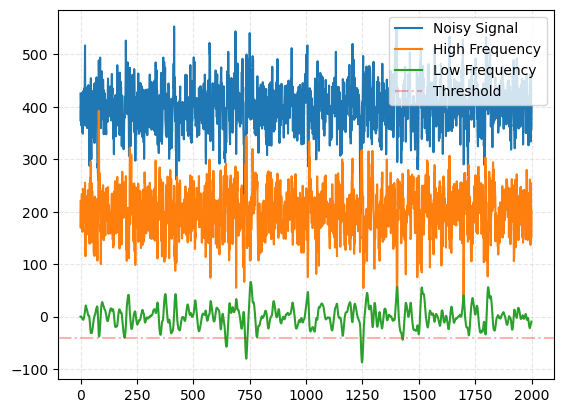

In [27]:
low_freq_data = apply_filter(noisy_signal, sos_bandpass)
high_freq_data = apply_filter(noisy_signal, sos_highpass)

# thresholds
threshold = -40
# crossing_points = np.where(np.diff((low_freq_data < threshold).astype(int)) == 1)[0]

crossing_points = []
for i in range(len(noisy_signal)//400 + 1):
    crossing_points.append(400*i + 200)

print(f'threshold: {threshold}, crossing points: {crossing_points}')

plt.figure()
plt.plot(400+noisy_signal[:2000], label='Noisy Signal')
plt.plot(200+high_freq_data[:2000], label='High Frequency')
plt.plot(low_freq_data[:2000], label='Low Frequency')
plt.axhline(y=threshold, color='r', linestyle='-.', label='Threshold', alpha=0.3)
plt.grid(linestyle='--', alpha=0.3)
plt.legend()
plt.show()

In [28]:
low_pre_ms = 2
low_segment_ms = 10
high_pre_ms = 0.5
high_segment_ms = 2

low_freq_segments = []
high_freq_segments = []
labels = []

for point in crossing_points:
    if point - low_pre_ms * fs / 1000 < 0 or point + low_segment_ms * fs / 1000 > len(low_freq_data):
        continue
    start_low = int(point - low_pre_ms * fs / 1000)
    end_low = int(start_low + low_segment_ms * fs / 1000)
    
    start_high = int(point - high_pre_ms * fs / 1000)
    end_high = int(start_high + high_segment_ms * fs / 1000)
    low_freq_segments.append(low_freq_data[start_low:end_low])
    high_freq_segments.append(high_freq_data[start_high:end_high])
    
    if point < len(new_signal1) and point % 400 < 300 and point % 400 > 100:
        labels.append(0)
    elif point > len(new_signal1) and point % 400 < 300 and point % 400 > 100: 
        labels.append(1)
    else: 
        labels.append(2)
    
low_freq_segments = np.array(low_freq_segments)
high_freq_segments = np.array(high_freq_segments)

# align the high_freq_segments
for i, segment in enumerate(high_freq_segments):
    peak_index = np.argmax(segment)  # Find the peak index
    start_adjusted = max(0, peak_index - int(2 * fs / 1000))  # Adjust start
    end_adjusted = min(len(segment), peak_index + int(5 * fs / 1000))  # Adjust end index
    high_freq_segments[i] = segment[start_adjusted:end_adjusted]

In [29]:
from sklearn.decomposition import PCA

# Flatten the segments
low_freq_vectors = low_freq_segments.reshape(low_freq_segments.shape[0], -1)
high_freq_vectors = high_freq_segments.reshape(high_freq_segments.shape[0], -1)
print(f'low freq vectors shape: {low_freq_vectors.shape}, high freq vectors shape: {high_freq_vectors.shape}')

# Perform PCA
pca_low = PCA(n_components=2)
pca_high = PCA(n_components=2)

low_freq_pca = pca_low.fit_transform(low_freq_vectors)
high_freq_pca = pca_high.fit_transform(high_freq_vectors)
print(f'low freq pca shape: {low_freq_pca.shape}, high freq pca shape: {high_freq_pca.shape}')

low freq vectors shape: (1799, 300), high freq vectors shape: (1799, 60)
low freq pca shape: (1799, 2), high freq pca shape: (1799, 2)


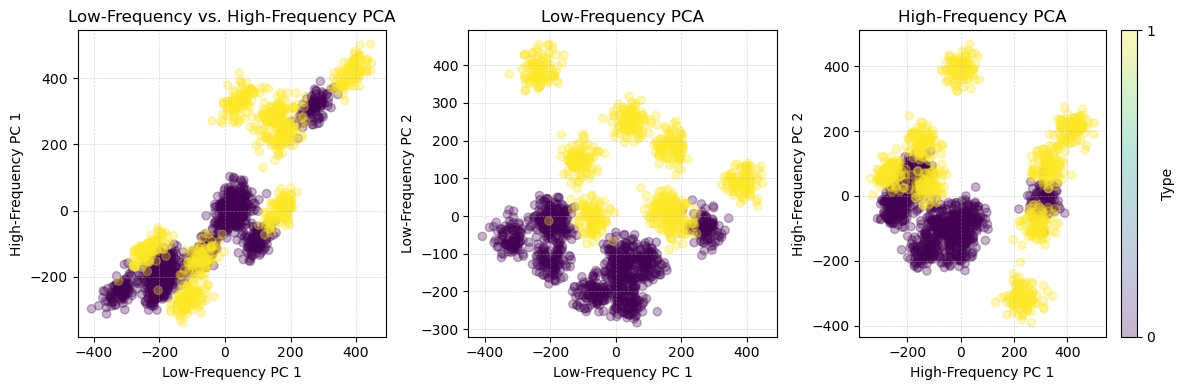

In [30]:
import matplotlib.pyplot as plt

# Plotting PCA results for low-frequency data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(low_freq_pca[:, 0], high_freq_pca[:, 0], alpha=0.3, c=labels, cmap='viridis')
plt.title('Low-Frequency vs. High-Frequency PCA')
plt.xlabel('Low-Frequency PC 1')
plt.ylabel('High-Frequency PC 1')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.subplot(1, 3, 2)
plt.scatter(low_freq_pca[:, 0], low_freq_pca[:, 1], alpha=0.3, c=labels, cmap='viridis')
plt.title('Low-Frequency PCA')
plt.xlabel('Low-Frequency PC 1')
plt.ylabel('Low-Frequency PC 2')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(high_freq_pca[:, 0], high_freq_pca[:, 1], alpha=0.3, c=labels, cmap='viridis')
plt.title('High-Frequency PCA')
plt.xlabel('High-Frequency PC 1')
plt.ylabel('High-Frequency PC 2')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.colorbar(label='Type', ticks=[0, 1, 2])
plt.tight_layout()
plt.show()